In [2]:
#Applying Decision Tree Classification to given dataset, analysing the performance and interpreting the result

import pandas as pd

data = pd.read_csv("D:\Datascience\heart_disease.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0


In [3]:
#Filling the missing values in 'oldpeak' column with the mean value
data['oldpeak'].fillna(data['oldpeak'].mean(), inplace=True)
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

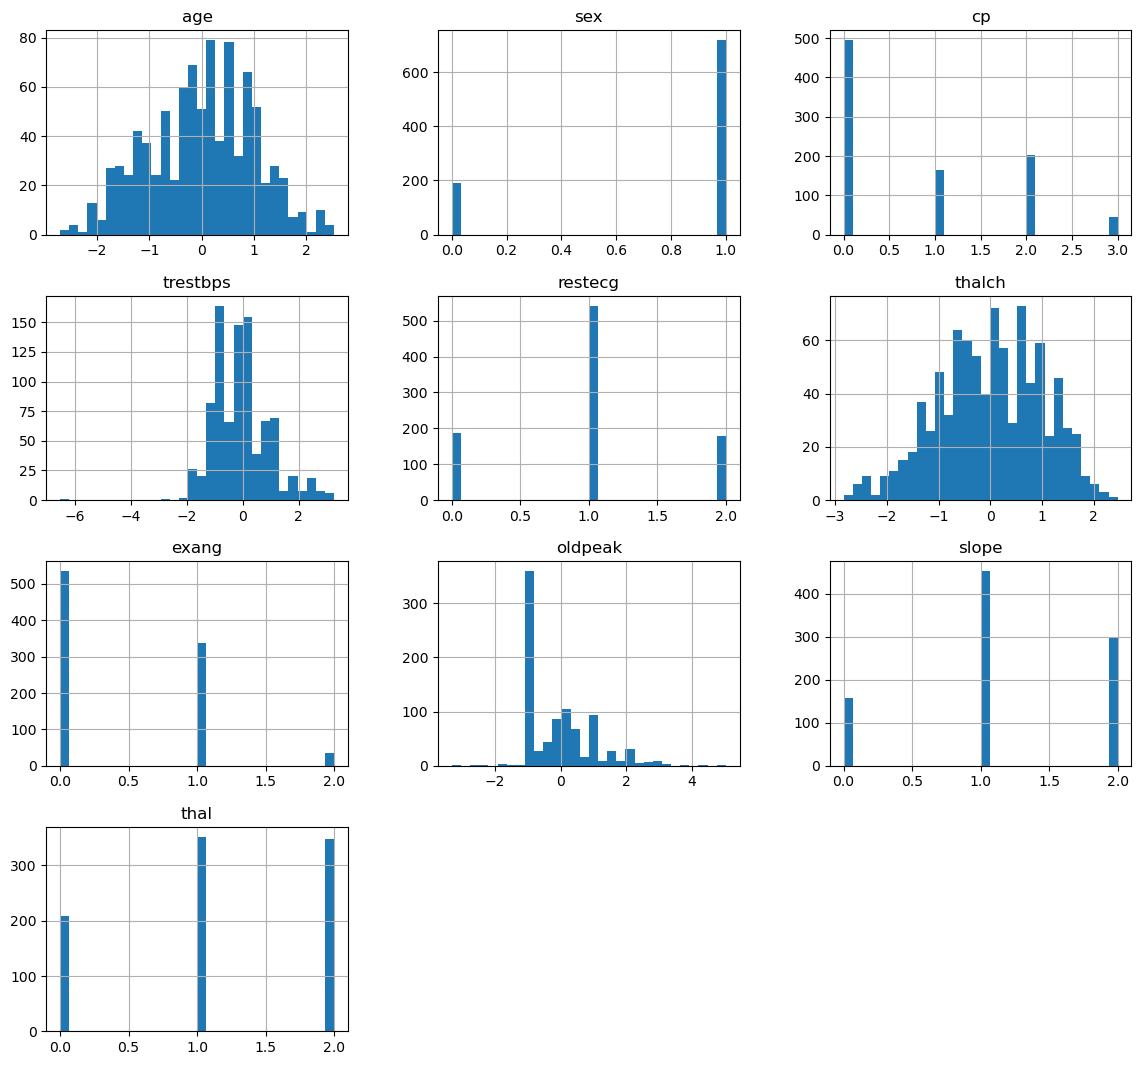

In [35]:
#histograms for the features in dataset
data.hist(bins=30, figsize=(14,13))
plt.show()

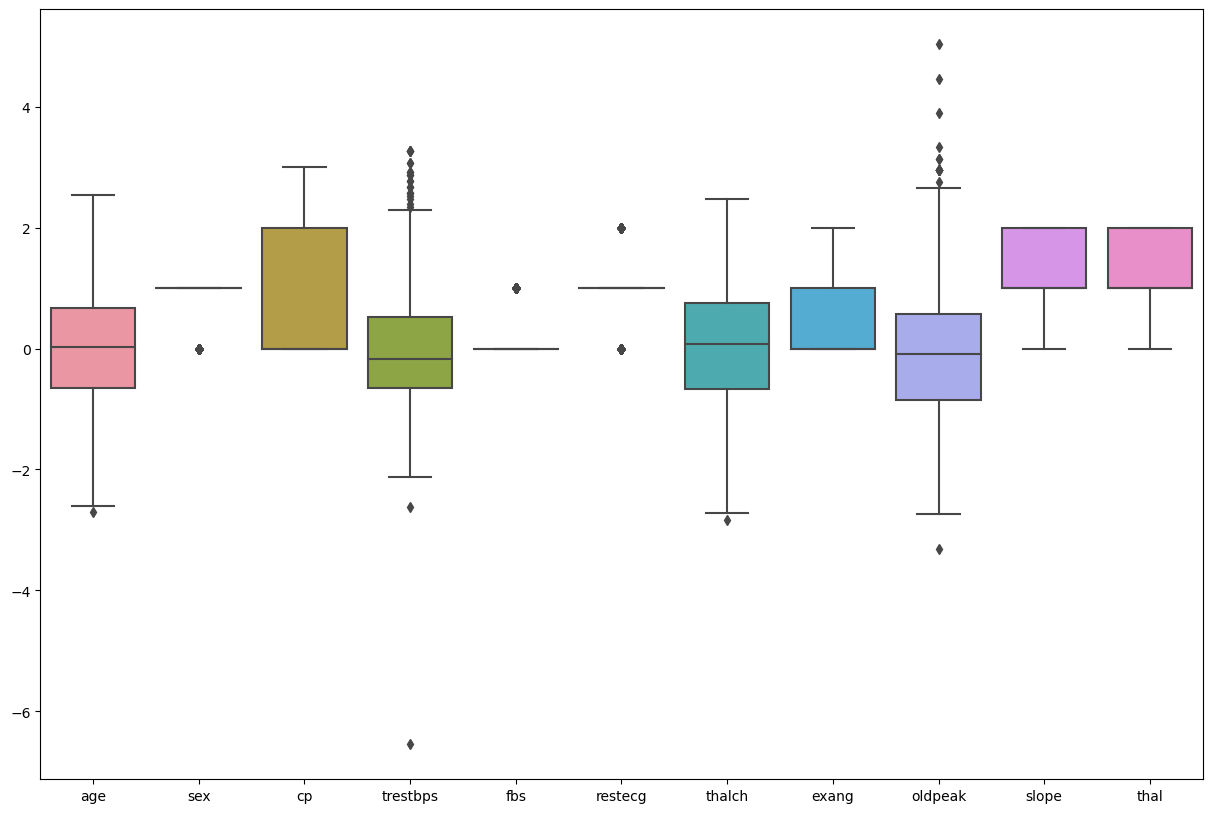

In [36]:
#boxplot for the features in dataset
plt.figure(figsize=(15,10))
sns.boxplot(data=data)
plt.show()

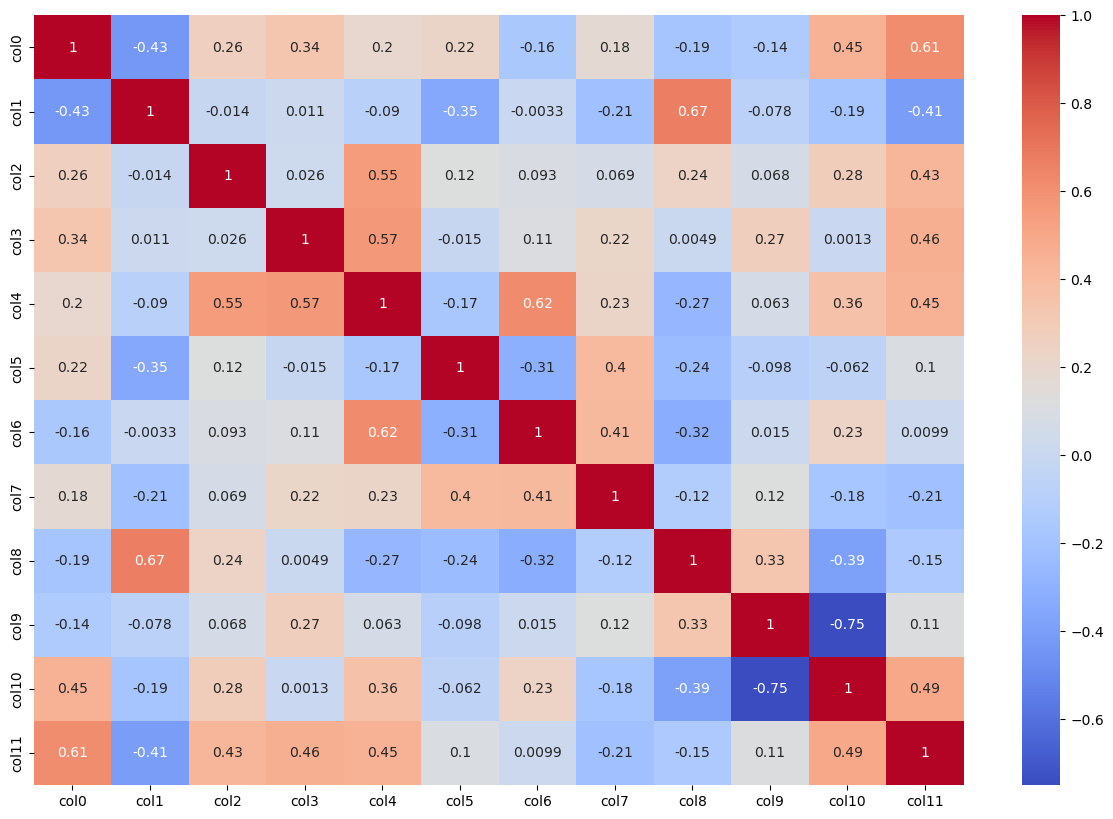

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

#Correlation matrix for the features
data = np.random.rand(10, 12)  # 10 rows and 12 columns of random numbers
data = pd.DataFrame(data, columns=[f'col{i}' for i in range(12)])

plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

In [4]:
from sklearn.preprocessing import LabelEncoder

# Encoding categorical variables with label encoding
label_encoders = {}
categorical_columns = data.select_dtypes(include=['object']).columns

for column in categorical_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,3,145,233,True,0,150,0,2.3,0,0,0
1,41,1,1,135,203,False,1,132,0,0.0,1,0,0
2,57,1,0,140,192,False,1,148,0,0.4,1,0,0
3,52,1,3,118,186,False,0,190,0,0.0,1,0,0
4,57,1,0,110,201,False,1,126,1,1.5,1,0,0


In [5]:
from sklearn.preprocessing import StandardScaler

# Scaling numerical features with StandardScaler
scaler = StandardScaler()
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,1.006027,1,3,0.567394,0.281297,True,0,0.524183,0,1.334996,0,0,-0.881977
1,-1.397560,1,1,0.076967,0.013526,False,1,-0.147705,0,-0.844594,1,0,-0.881977
2,0.350503,1,0,0.322181,-0.084656,False,1,0.449529,0,-0.465535,1,0,-0.881977
3,-0.195767,1,3,-0.756760,-0.138211,False,0,2.017268,0,-0.844594,1,0,-0.881977
4,0.350503,1,0,-1.149102,-0.004325,False,1,-0.371668,1,0.576878,1,0,-0.881977


In [15]:
# Inspecting the target column 'num'
print(data['num'].describe())
print(data['num'].unique())

count     908
unique      2
top         0
freq      664
Name: num, dtype: int64
[0, 1]
Categories (2, int64): [0, 1]


In [18]:
# Convert the 'num' column to binary (0 for no disease, 1 for disease)
data['num'] = data['num'].apply(lambda x: 1 if x > 0 else 0).astype('category')
print(data['num'].unique())

[0, 1]
Categories (2, int64): [0, 1]


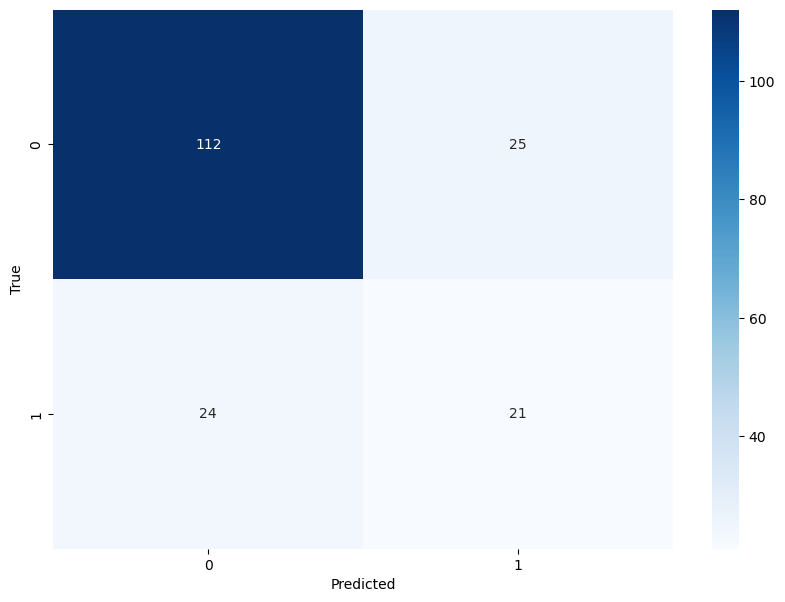

{'Accuracy': 0.7307692307692307,
 'Precision': 0.45652173913043476,
 'Recall': 0.4666666666666667,
 'F1-Score': 0.46153846153846156,
 'ROC-AUC': 0.6420924574209246}

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare features and target
X = data.drop(columns=target_column)
y = data[target_column]

# Split the dataset (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Implementing Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predicting on the test set
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1]

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

results = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1-Score": f1,
    "ROC-AUC": roc_auc
}

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

results

In [29]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Score: {best_score}")

# Train the model with the best parameters
best_clf = grid_search.best_estimator_
y_pred_best = best_clf.predict(X_test)
y_proba_best = best_clf.predict_proba(X_test)[:, 1]

# Evaluating the tuned model
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best)
roc_auc_best = roc_auc_score(y_test, y_proba_best)

print(f"The Best Model Accuracy: {accuracy_best}")
print(f"The Best Model Precision: {precision_best}")
print(f"The Best Model Recall: {recall_best}")
print(f"The Best Model F1-Score: {f1_best}")
print(f"The Best Model ROC-AUC: {roc_auc_best}")


Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10}
Best Score: 0.7341709966934341
The Best Model Accuracy: 0.7307692307692307
The Best Model Precision: 0.45
The Best Model Recall: 0.4
The Best Model F1-Score: 0.4235294117647059
The Best Model ROC-AUC: 0.7163828061638281


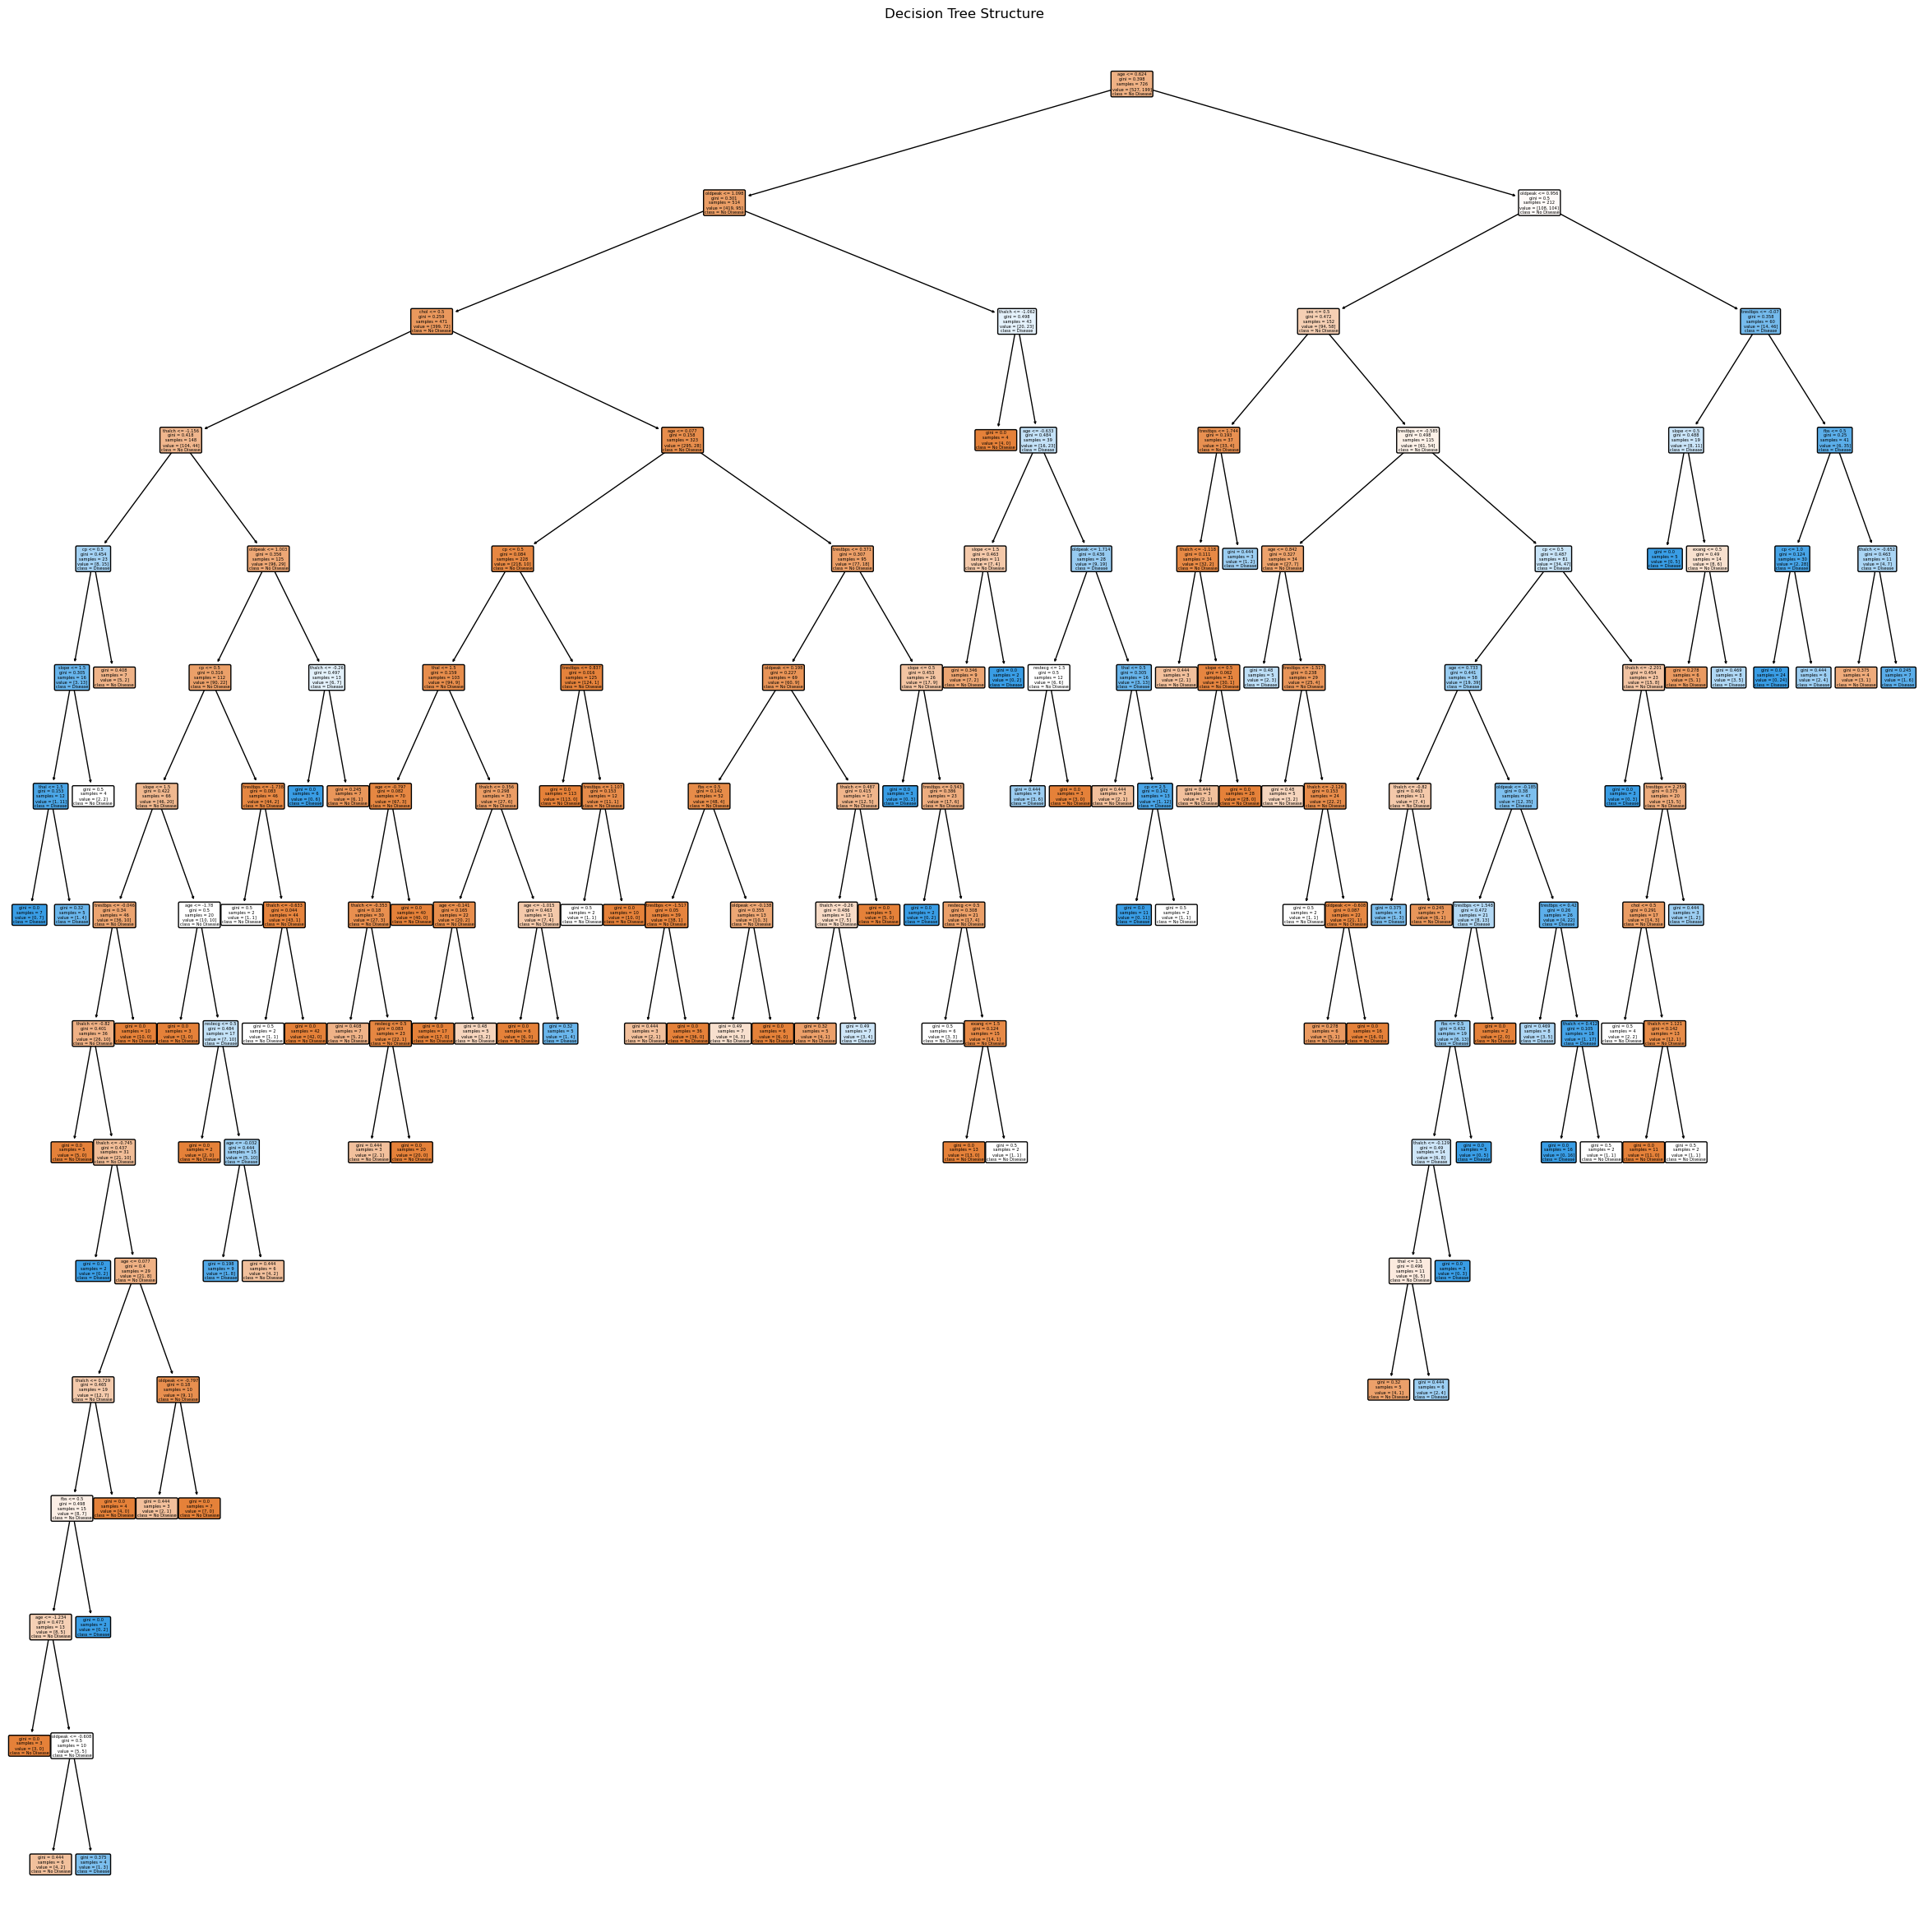

In [31]:
from sklearn.tree import plot_tree

# Convert feature names to list
feature_names = X.columns.tolist()

# Visualize the decision tree
plt.figure(figsize=(30, 30))
plot_tree(best_clf, feature_names=feature_names, class_names=['No Disease', 'Disease'], filled=True, rounded=True)
plt.title('Decision Tree Structure')
plt.show()



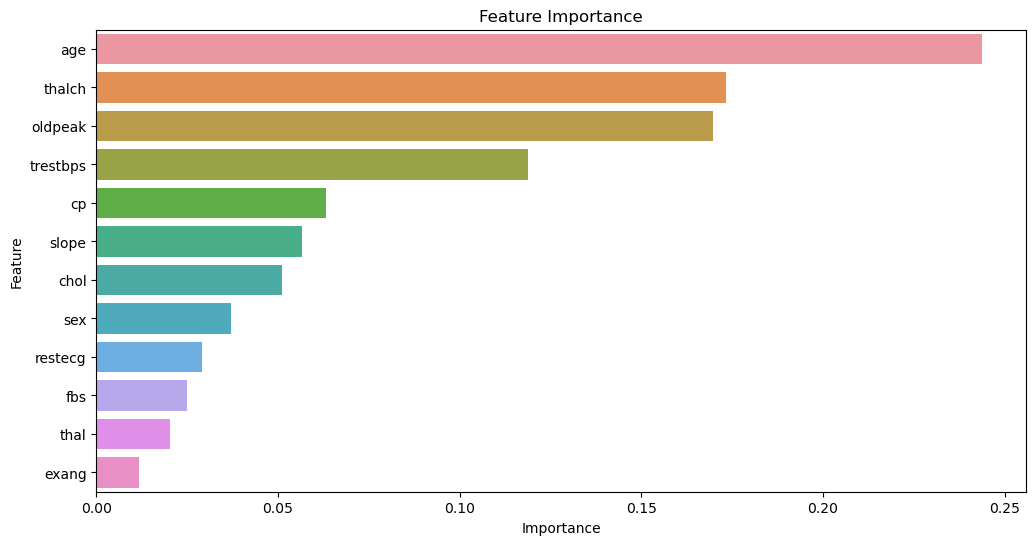

In [32]:
# Feature importance
feature_importances = pd.Series(best_clf.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [ ]:
#number of branches in decision tree
#Maximum depth: Sets the maximum level the tree can reach during training. Deeper trees can capture more complex relationships in the data, but may also overfit.
#Minimum samples leaf: Controls the minimum number of examples a terminal leaf node can have.
#Maximum features: Controls the number of features considered for splitting.
#Minimum impurity decrease: Controls the minimum amount of impurity allowed in each split.
#Splitting criteria: Can be Gini or entropy.
#Minimum samples split: Encourages the tree to search for pure nodes.
#Randomly selected number of features: Introduces randomness during training. 

#Hyperparameters helps the model learn faster, achieve higher accuracy, generalize better to new data, and avoid overfitting or underfitting.


In [ ]:
#Label Encoding only has single column for categorical variable
#Suits ordinal data in decision tree

#One-hot Encoding has many binary columns based on number of categories
#Suits nominal data in decsion tree